In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH_IN  =  '~/10JulyI9C1AbnWeekly_Select_Causes__2014-2020.csv'
dfj = pd.read_csv(PATH_IN,sep=',',parse_dates=['Week Ending Date'])
dfj.index = dfj['Week Ending Date']

In [3]:
p='~/26AugustI9C1AbnWeekly_Select_Causes__2019-2020.csv'
df_aug26 = pd.read_csv(p,sep=',',parse_dates=['Week Ending Date'])
df_aug26.index = df_aug26['Week Ending Date']

In [4]:
dfj = pd.concat([dfj[:'2019'],df_aug26['2020']])
dfj = dfj.iloc[1:,:]

In [5]:
# Define Respiratory Illness cause of death by combining Other Resp. and Chronic Lower Resp.

dfj['RespIllness'] =  dfj['Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)'] + dfj['Chronic lower respiratory diseases (J40-J47)']
dfj['NatPercRespIllness']  = dfj['RespIllness'] / dfj['Natural Cause']

dfj['NoCPercRespIllness'] =   dfj['RespIllness'] / (dfj['Natural Cause']  - dfj['COVID-19 (U071, Underlying Cause of Death)'])  
dfj['NoCAPercRespIllness'] =  dfj['RespIllness'] / (dfj['Natural Cause']  - dfj['COVID-19 (U071, Underlying Cause of Death)'] - dfj['Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)'])

In [30]:
# Define a bunch of hex colors
blue = '#1E90FF'
darkblue='#4682B4'
orange='#FF7F0EFF'
sepsis_red = '#9d0000'
purp_blue='#5d2be2'
purp_blue2 = '#50327c'
bright_pink='#ff00ff'
bright_yllw='#eaff00'
limegreen='#32CD32'
red='#FF0000'
darkgreen='#006400'
siennabrown = '#A0522D'
gold='#d4af37'

In [8]:
# Define columns we want for each plot. Leave out 'other resp' and 'chronic lower resp'
# and add in resp illness

raw_nums = ['COVID-19 (U071, Underlying Cause of Death)',
            'Malignant neoplasms (C00-C97)',# 'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)','Chronic lower respiratory diseases (J40-J47)',
            'RespIllness',
            'Influenza and pneumonia (J10-J18)',
           'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
           'Diseases of heart (I00-I09,I11,I13,I20-I51)','UnIdentified','Diabetes mellitus (E10-E14)',
           'Alzheimer disease (G30)','Cerebrovascular diseases (I60-I69)','Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
            'Septicemia (A40-A41)']

nat_cols =['NatPercUndCOVID',
            'NatPercMalignant', #'NatPercOtherResp','NatPercChronicResp'
            'NatPercRespIllness', 
           'NatPercFluPneu',
           'NatPercAbnormalLabs'
            ,'NatPercCardio',
            'NatPercUnidentifed',
            'NatPercDiabetes', 
           'NatPercAlzheimers',
            'NatPercCerebrovasc',
            'NatPercNephritis',
            'NatPercSept']

no_cov_cols = ['NoCPercMalignant','NoCPercRespIllness','NoCPercFluPneu', 'NoCPercAbnormalLabs','NoCPercCardio',
'NoCPercUnidentifed','NoCPercDiabetes','NoCPercAlzheimers','NoCPercCerebrovasc','NoCPercNephritis', 'NoCPercSept']

# Define legend
legend = ['COVID-19',
          'Malignant neoplasms', #'Other diseases of respiratory system','Chronic lower respiratory diseases',
         'Respiratory Illnesses',
          'Influenza and pneumonia',
          'Symptoms, signs and abnormal clinical findings',
          'Diseases of the heart',
         'UnIdentified',
          'Diabetes mellitus',
          'Alzheimer disease', 
          'Cerebrovascular diseases', 
          'Nephritis, nephrotic syndrome and nephrosis',
          'Septicemia']

# Define color scheme
clr_reord = [bright_pink,orange,darkblue,blue,bright_yllw,red,siennabrown,darkgreen,
             purp_blue2,purp_blue,limegreen,sepsis_red]

assert len(clr_reord) == len(legend) == len(nat_cols)       

In [24]:
# Specify which plot you want to generate (a,b or c)
nat_w_covid = 0
nat_wo_covid = 0
raw_counts = 1

#...and define some parameters
if nat_w_covid:
    cols = nat_cols 
    legend_ = legend
    clr_reord_ = clr_reord
    save='nat%_w_covid'
    title = 'Deaths from Natural Causes by Percentage'
    legend_[4] = 'Symptoms, signs and\nabnormal clinical findings\nnot otherwise attributed'
    legend_[-2] = 'Nephritis, nephrotic\nsyndrome and nephrosis'
    legend_[-7]
elif nat_wo_covid:
    cols = no_cov_cols
    legend_ = legend[1:]
    clr_reord_ = clr_reord[1:]
    save='nat%_wo_covid'
    title = 'Deaths from Natural Causes by Percentage (excluding COVID-19)'
elif raw_counts:
    cols= raw_nums
    legend_ = legend
    legend_[5] = 'Symptoms, signs and abnormal\nclinical findings\nnot otherwise attributed'
    legend_[-2] = 'Nephritis, nephrotic syndrome\n and nephrosis'
    clr_reord_ = clr_reord
    save='raw_numbers'
    title = 'Death from Natural Causes'
    
assert len(clr_reord_) == len(legend_)


In [ ]:
out_path = '/path/to/save/figure1/'


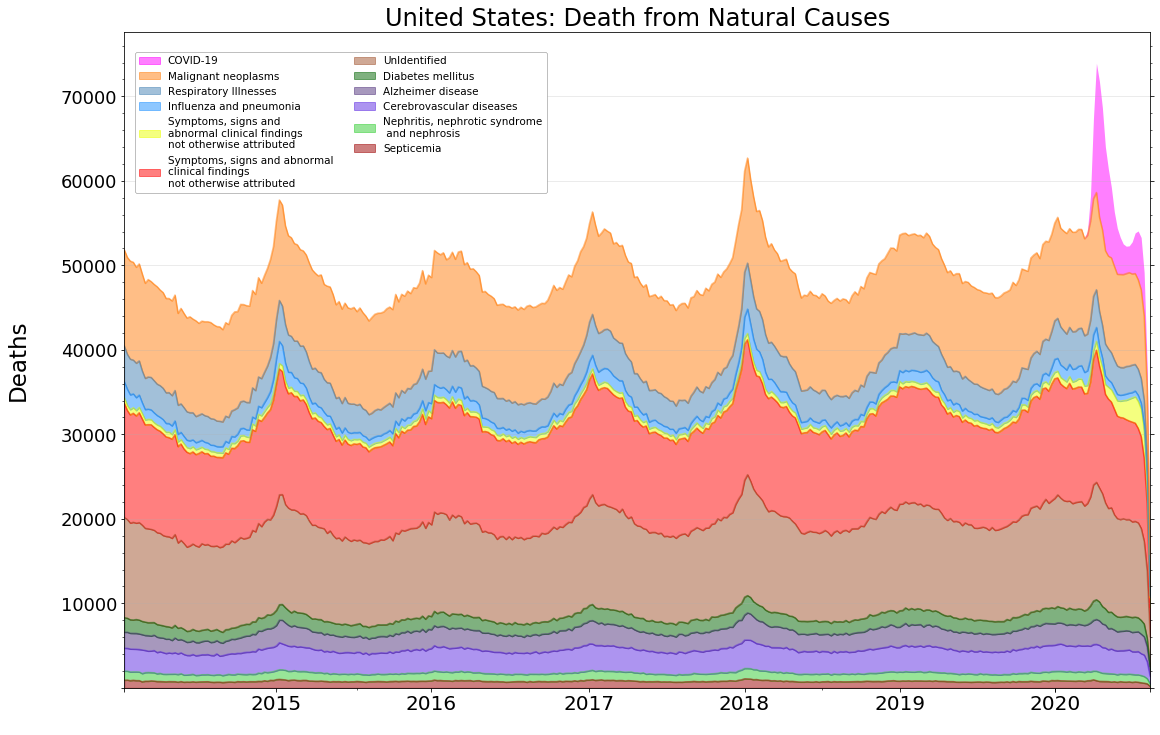

In [21]:

for i in ['United States']: #df3['Jurisdiction of Occurrence'].unique():
    if raw_counts: 
        state_stack = dfj[dfj['Jurisdiction of Occurrence'] == i].iloc[1:,:]['2014-01-01':] 
    else: 
        state_stack = dfj[dfj['Jurisdiction of Occurrence'] == i]['2019-9':]
    stack2 = state_stack[cols[::-1]]
    stack2.columns=legend_
    
    ax = stack2.plot.area(alpha=.5,color=clr_reord_[::-1],figsize=(16,10))

    handles, labels = ax.get_legend_handles_labels()    
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    if nat_w_covid or nat_wo_covid:  
        plt.ylim([0,1.004])
        vals = np.arange(0, 1.001, step=0.1); plt.yticks(vals)
        ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals],size=12) 
        leg=ax.legend(handles[::-1], labels,fontsize=12.4,ncol=1,loc=(.02,.01),frameon=True,framealpha=0.85) # normal
        plt.ylabel('Percentage of Deaths',size=23); plt.xlabel('  ')
        ax.get_legend().remove() # we only want a legend in the raw counts plot 
        
    if raw_counts: 
        leg=ax.legend(handles[::-1], labels,fontsize=10.4,ncol=2,loc=(.01,.755),frameon=True,framealpha=1) # below
        leg.get_frame().set_linewidth(0.5)
        leg.get_frame().set_edgecolor('gray')
        plt.ylabel('Deaths\n',size=23); plt.xlabel('  '); 
    
    plt.tight_layout()
    plt.title(f'{i}: {title}',size=24);  plt.grid(axis='y',alpha=.3)

    plt.setp(ax.lines[-1], linewidth=0) # must set BOTH  ax.lines & ax.collections[-1].set_linewidth(0) to remove top pink line
    ax.collections[-1].set_linewidth([0])  #https://stackoverflow.com/questions/49588892/how-can-i-change-the-filled-color-of-stacked-area-plot-in-dataframe
    
    ax.date_axis_info[17] = (2609,  True, False, b'%b')

    ylabels = [item.get_text() for item in ax.get_yticklabels()];
    ylabels[0] = ''; 
    ax.set_yticklabels(ylabels,size=15)  # remove 0% label on y axis if it Overlaps with 'Sep'
     
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.tick_params(axis='y', which='major', labelsize=18)

    plt.minorticks_on()
    ax.yaxis.set_ticks_position('both')
    
    if raw_counts: 
        plt.savefig(out_path+f'stackplot_{save}_14-20.png', bbox_extra_artists=(leg,), bbox_inches='tight',dpi=600)
    else: 
        plt.savefig(out_path+f'stackplot_{save}.png', 
                    bbox_extra_artists=(leg,), bbox_inches='tight',dpi=600)
        

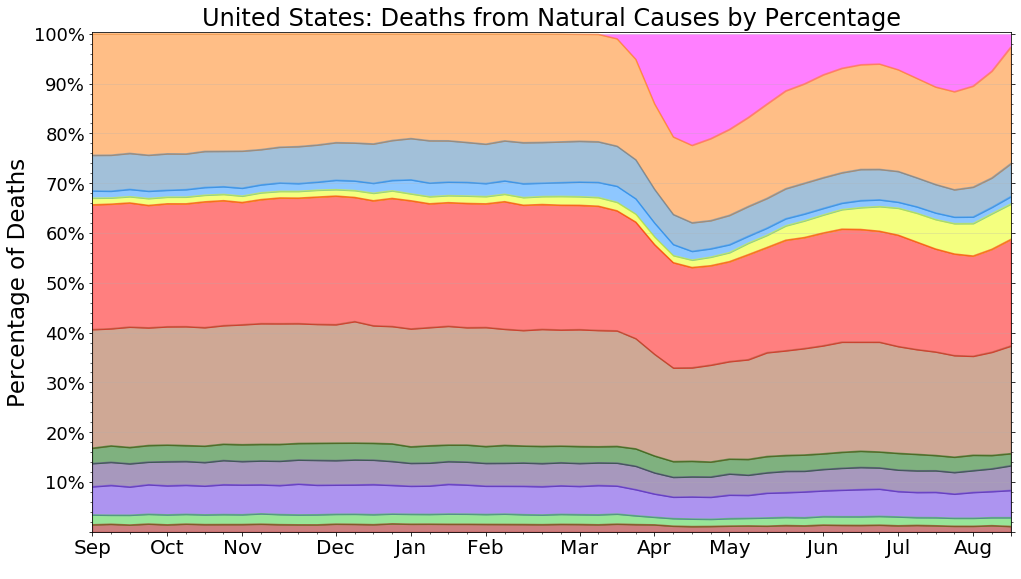

In [23]:
# Rerun main code block with nat_w_cov = 1 to produce figure 1b    

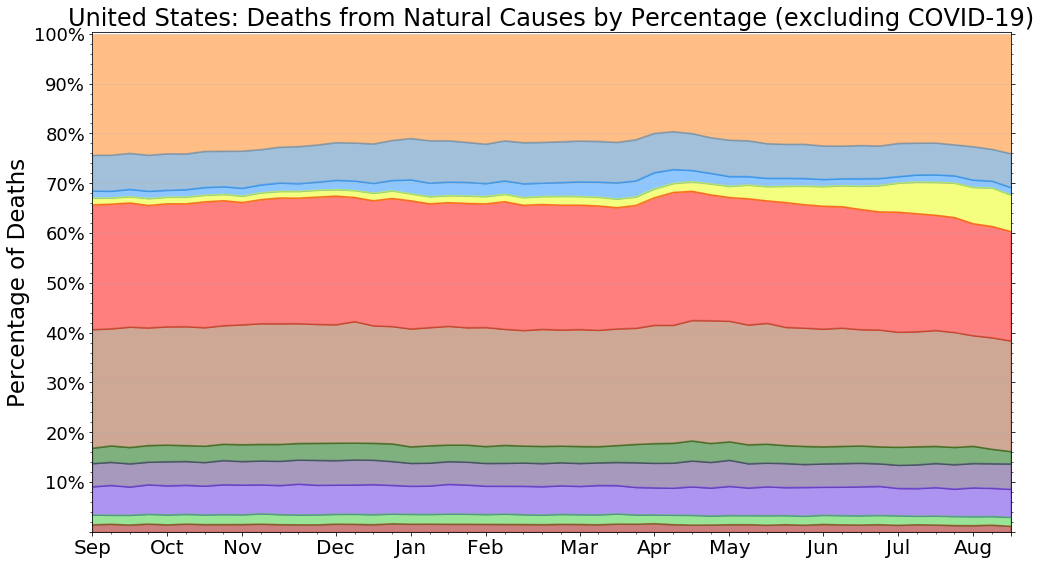

In [25]:
# Run main code block with nat_wo_cov = 1 to produce figure 1c

## Figure 2

In [31]:
# Define a cause dictionary that maps each cause to its column headers, alias, plot color and plot title

cause_dict = { 
'Diseases of heart (I00-I09,I11,I13,I20-I51)': ('NatPercCardio','NoCPercCardio','NoCAPercCardio','Heart',red,'Diseases of the heart (I00-I09,I11,I13,I20-I51)'),
  'Influenza and pneumonia (J10-J18)': ('NatPercFluPneu','NoCPercFluPneu','NoCAPercFluPneu','FluPneum',blue,'Influenza and pneumonia (J10-J18)' ),
  'Septicemia (A40-A41)': ('NatPercSept','NoCPercSept','NoCAPercSept','Sepsis',sepsis_red,'Septicemia (A40-A41)'),
  'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)': ('NatPercAbnormalLabs','NoCPercAbnormalLabs','NoCAPercAbnormalLabs','AbnormalLabs',bright_yllw,'Symptoms, signs and abnormal clinical and laboratory findings,\n not elsewhere classified (R00-R99)'),
 'Malignant neoplasms (C00-C97)': ('NatPercMalignant','NoCPercMalignant','NoCAPercMalignant','Cancer',orange, 'Malignant neoplasms (C00-C97)'),
 # 'Chronic lower respiratory diseases (J40-J47)': ('NatPercChronicResp','NoCPercChronicResp','NoCAPercChronicResp','ChronicResp',blue,'Chronic lower respiratory diseases (J40-J47)'),
  'Diabetes mellitus (E10-E14)': ('NatPercDiabetes','NoCPercDiabetes','NoCAPercDiabetes','Diabetes',darkgreen,'Diabetes mellitus (E10-E14)'),
  'Alzheimer disease (G30)': ('NatPercAlzheimers', 'NoCPercAlzheimers','NoCAPercAlzheimers',"Alzheimer's",purp_blue2,'Alzheimer disease (G30)'),
  'Cerebrovascular diseases (I60-I69)': ('NatPercCerebrovasc','NoCPercCerebrovasc','NoCAPercCerebrovasc','Stroke',purp_blue,'Cerebrovascular diseases (I60-I69)'),
  'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)': ('NatPercNephritis','NoCPercNephritis','NoCAPercNephritis','Nephritis',limegreen,'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)'),
#  'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)': ('NatPercOtherResp','NoCPercOtherResp','NoCAPercOtherResp','OtherResp',lightblue,'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)'),
  'UnIdentified': ('NatPercUnidentifed','NoCPercUnidentifed','NoCAPercUnidentifed','UnIdentified',siennabrown,'UnIdentified'),
'Unnatural': ('AllPercUnnatural','AllNoCPercUnNatural','AllNoCAPercUnNatural','UnNatural','#008B8B','Unnatural'),
'RespIllness': ('NatPercRespIllness','NoCPercRespIllness','NoCAPercRespIllness','Respiratory_Illness',darkblue,'Respiratory Illness')
}

In [32]:
# Define formatting function

def format_trendplot(fig,ax,state,cause_title,cause_save):
    plt.title(f'{cause_title}',size=23)
    if cause_save=='AbnormalLabs':
        plt.legend(['2014','2015','2016','2017','2018','2019',"'14-'19 mean",'2020 Nat%','2020 NoCPerc%'],ncol=2,fontsize=14)
    else:
        plt.legend(['2014','2015','2016','2017','2018','2019',"'14-'19 mean",'2020 Nat%',
                                    '2020 NoCPerc%','2020 NoCAPerc%'],ncol=2,fontsize=14)
    plt.grid(alpha=0.4)
    plt.autoscale(enable=True, axis='x', tight=True)
    vals = ax.get_yticks()
    valsrnd = [round(i,2) for i in vals ]
    if  len(valsrnd) != len(np.unique(valsrnd)):  ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals],size=12)
    else:  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals],size=12)
            
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.tick_params(axis='y', which='major', labelsize=18)

    plt.ylabel('% Death',size=20)
    plt.xlabel('')
    
cause_dict_ab  = { 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)': ('NatPercAbnormalLabs',
                                                        'NoCPercAbnormalLabs','NoCAPercAbnormalLabs','AbnormalLabs',bright_yllw)}


In [ ]:
out_path = 'path/to/save/figure2/'


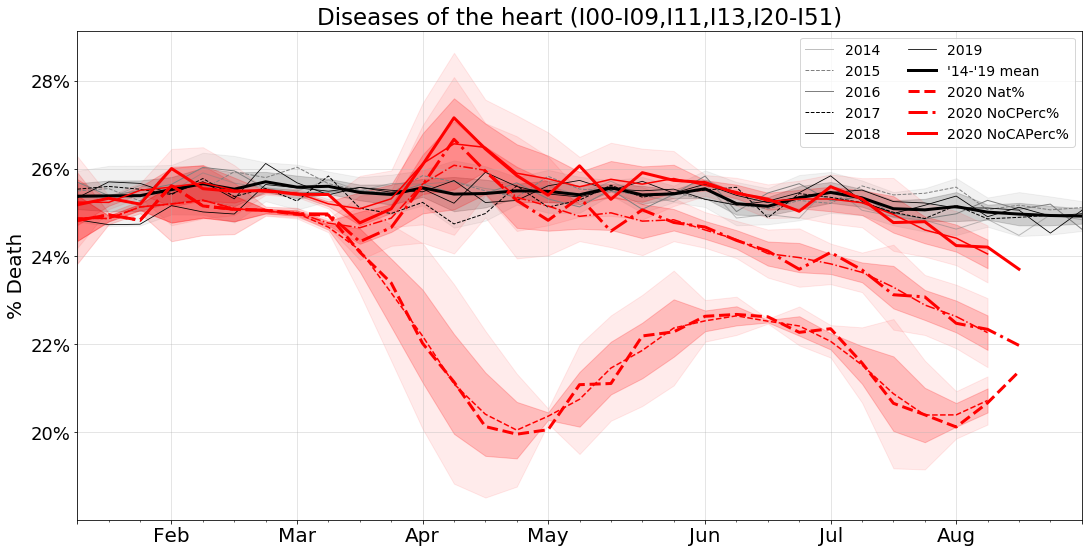

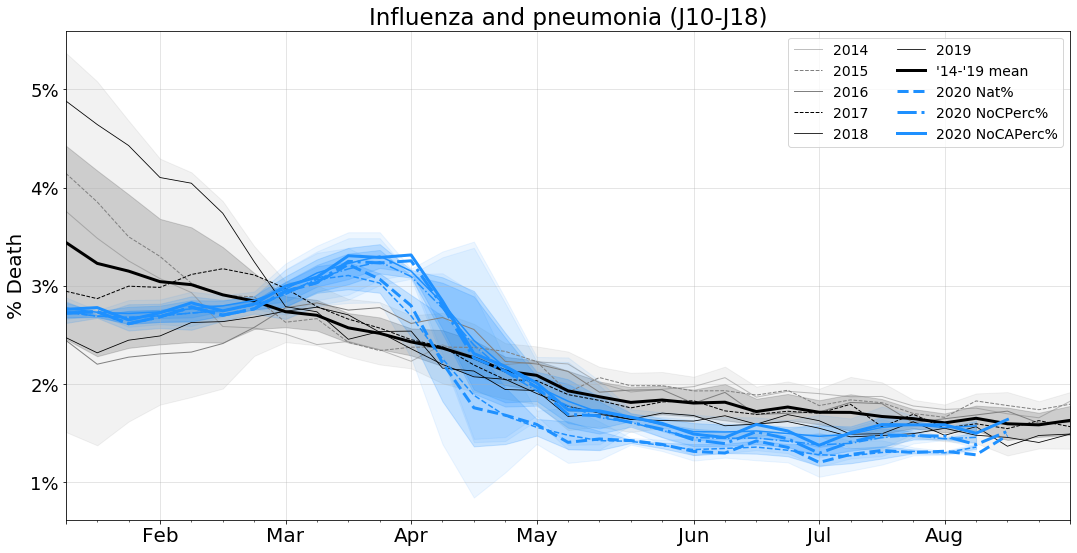

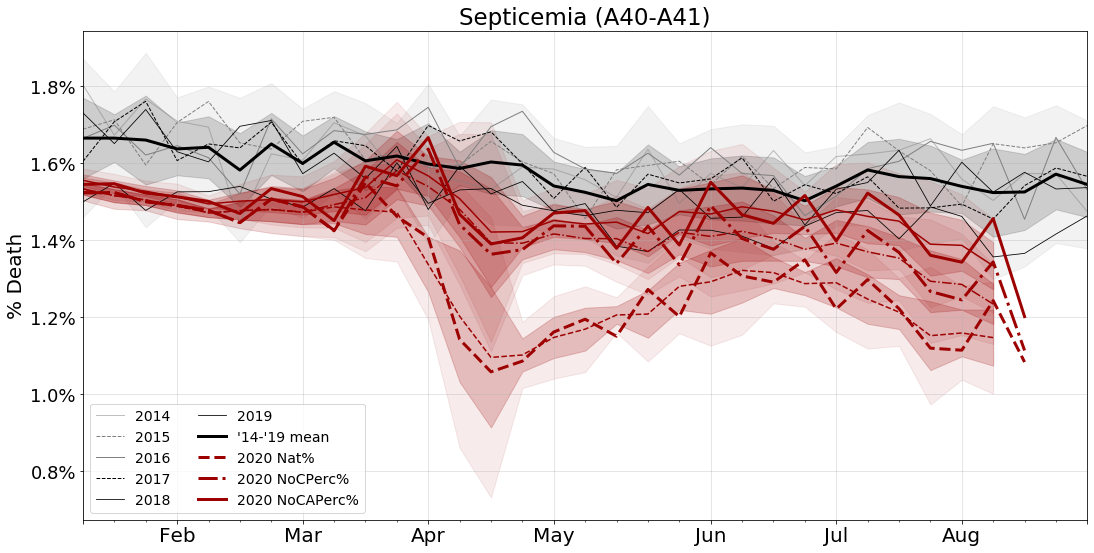

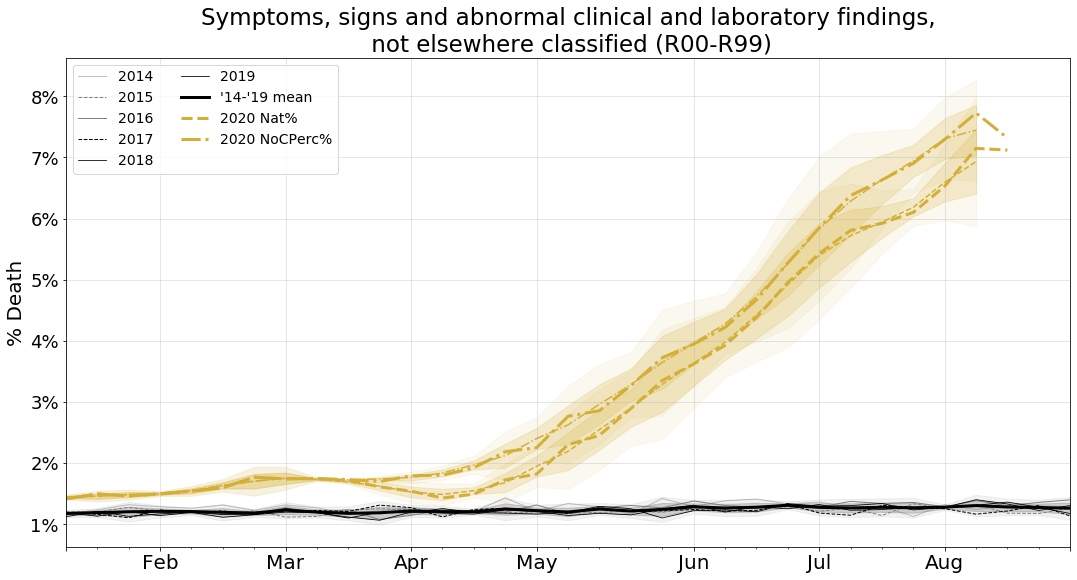

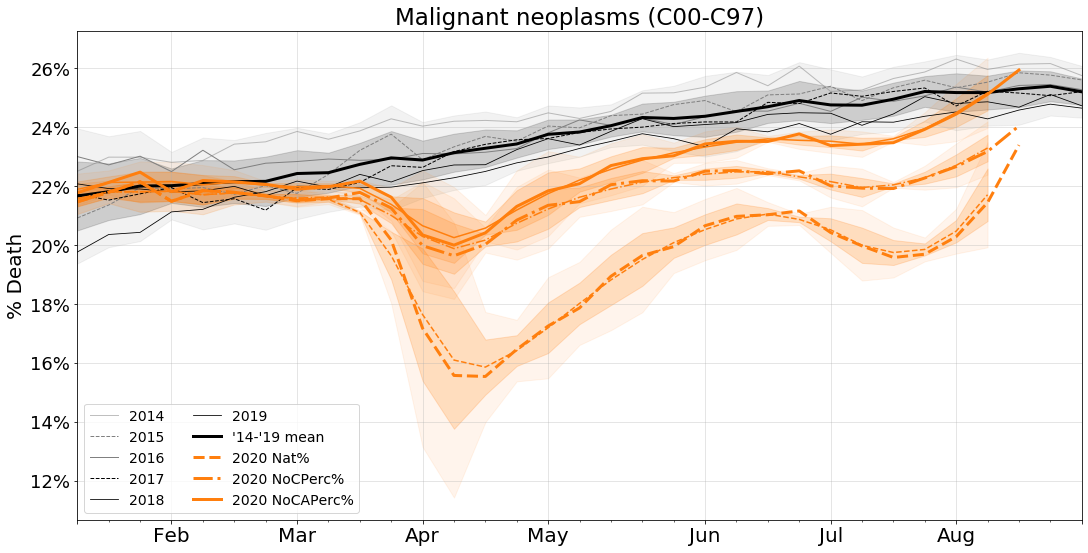

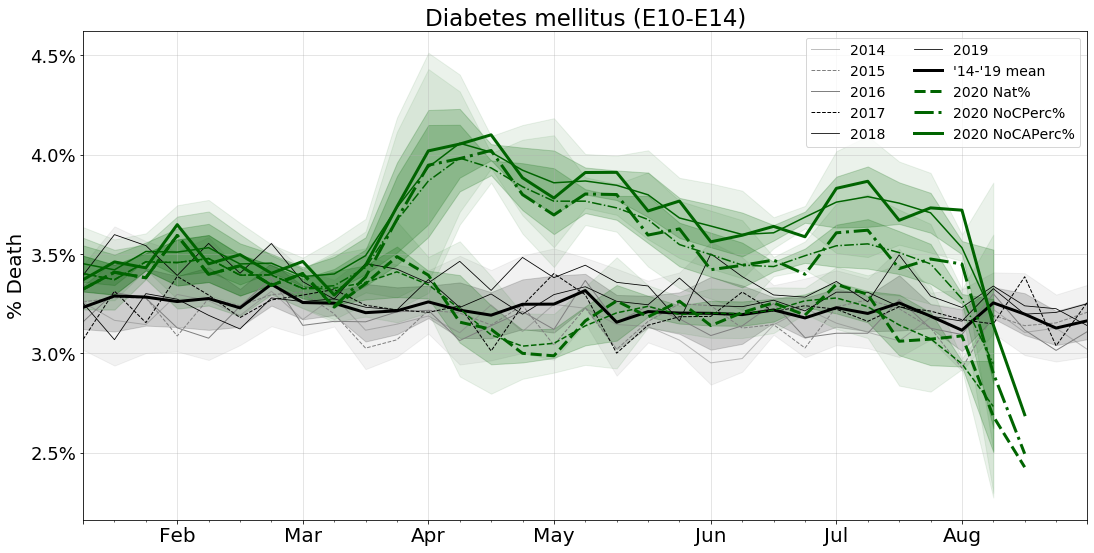

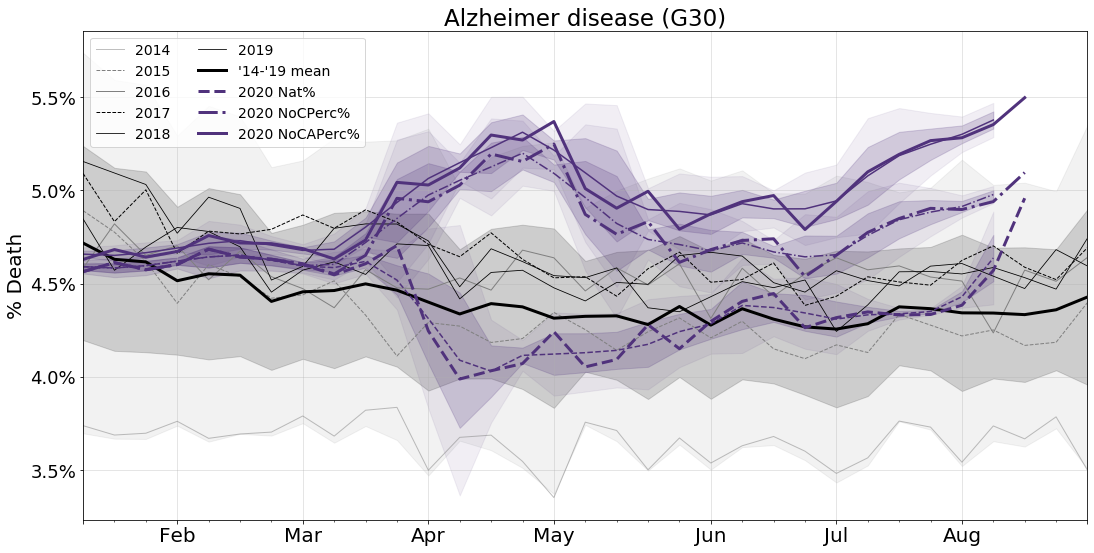

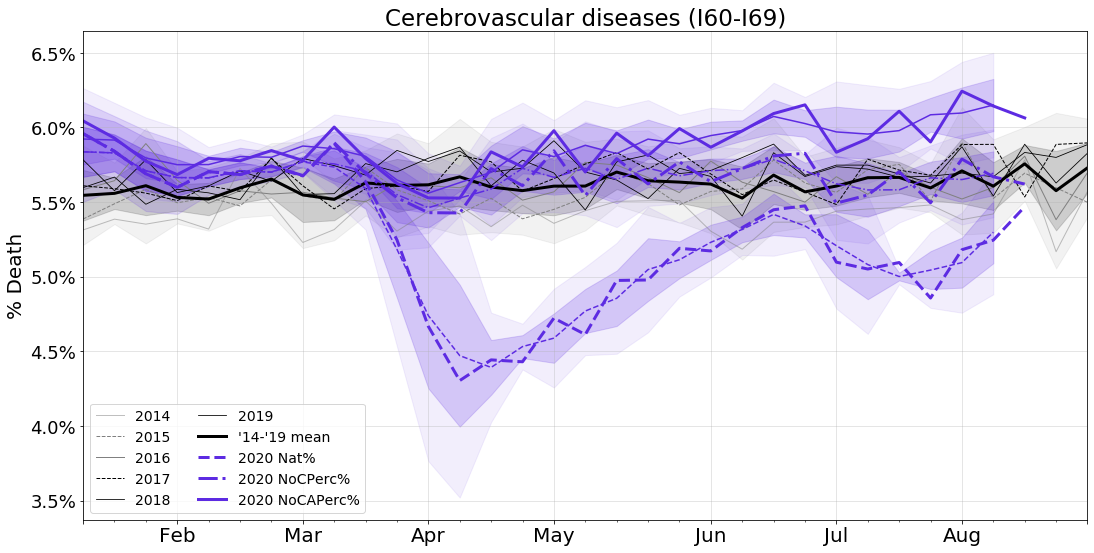

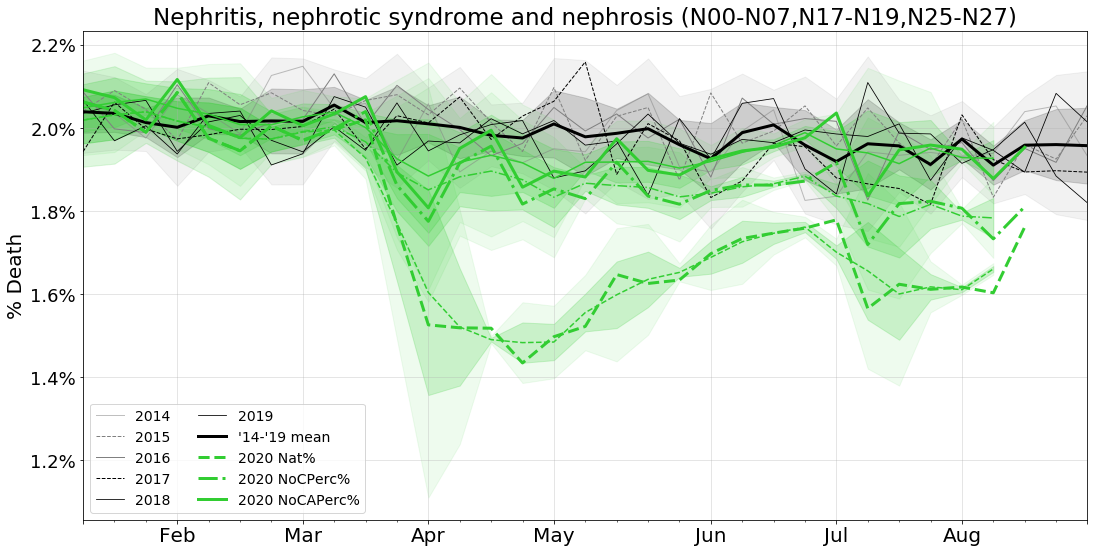

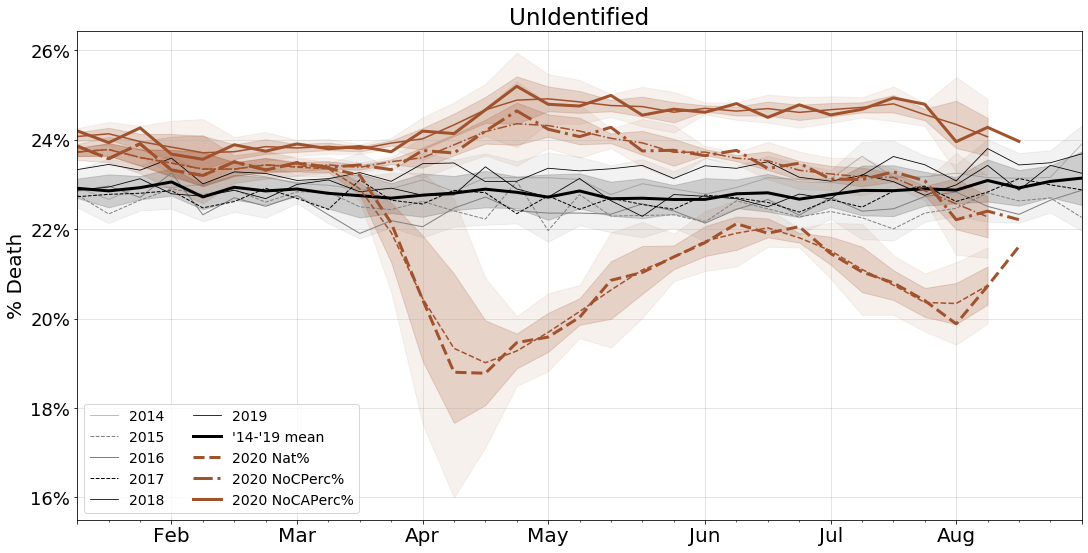

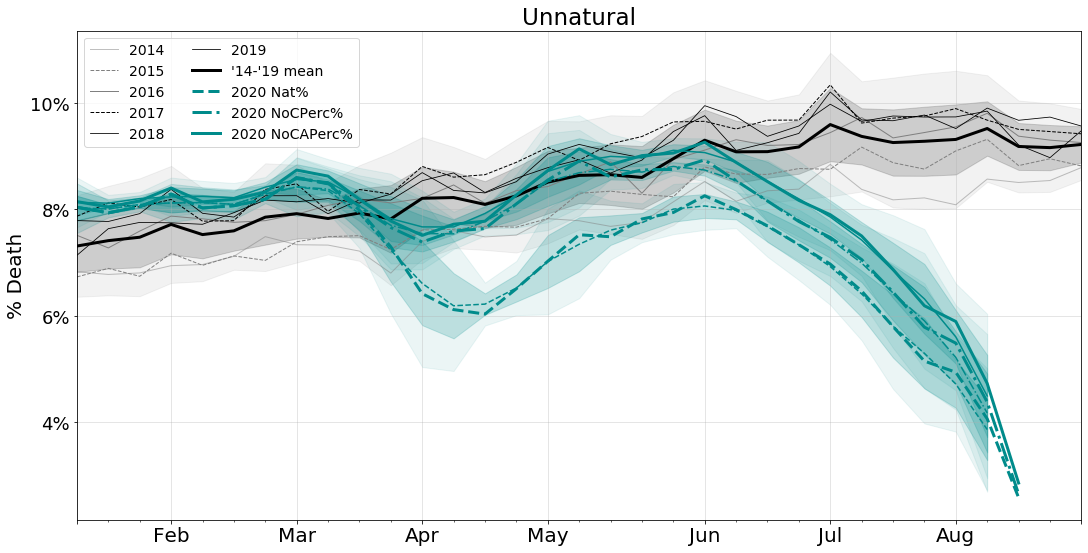

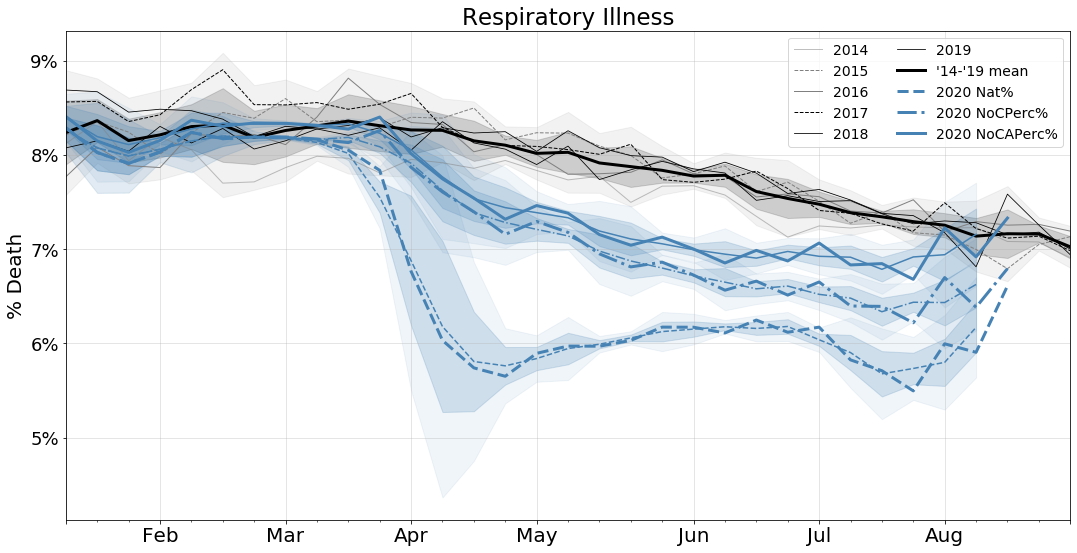

In [33]:
state = 'United States' # Only plot data for US
MA=3 # number of weeks for moving average

for c in cause_dict.keys():   
    cause_NAT = cause_dict[c][0]
    cause_NoC = cause_dict[c][1]
    cause_NoCA = cause_dict[c][2]
    cause_save = cause_dict[c][3]
    cause_color  = cause_dict[c][4]
    cause_title = cause_dict[c][5]
    df_c = dfj[dfj['Jurisdiction of Occurrence'] == state][cause_NAT]
    tx = df_c['2015'][0:52].index
    
    df_means = pd.concat([pd.Series(i.values) for i in [df_c['2014'][0:52],df_c['2015'][0:52], df_c['2016'][0:52], df_c['2017'][0:52],df_c['2018'][0:52], df_c['2019'][0:52]]],axis=1)
    df_means.columns=['2014','2015','2016','2017','2018','2019']
    means = df_means.mean(axis=1);
    stds =df_means.std(axis=1); 

    plt.figure(figsize=(18,9));   aug  = 35

    a=df_c['2014'][0:52]; a.index = tx; a[2:aug].plot(linewidth=1.,color='gray',alpha=.5,linestyle='-')
    b=df_c['2015'][0:52]; b.index = tx; b[2:aug].plot(linewidth=1.,color='gray',alpha=1,linestyle='--')

    c=df_c['2016'][0:52]; c.index = tx; c[2:aug].plot(linewidth=1.,color='gray',alpha=1,linestyle='-')
    d=df_c['2017'][0:52]; d.index = tx; d[2:aug].plot(linewidth=1.,color='k',alpha=1,linestyle='--')

    e=df_c['2018'][0:52]; e.index = tx; e[2:aug].plot(linewidth=.8,color='k',alpha=1,linestyle='-')
    f=df_c['2019'][0:52]; f.index = tx; f[2:aug].plot(linewidth=.8,color='k',alpha=1,linestyle='-')
    
    # Plot mean/std
    means.index  = tx; stds.index = tx; means[2:aug].plot(linewidth=3,color='k')

    plt.fill_between(means[2:aug].index,means[2:aug]-(1*stds[2:aug]), means[2:aug]+(1*stds[2:aug]), color='k', alpha=0.15)
    plt.fill_between(means[2:aug].index,means[2:aug]-(1.96*stds[2:aug]), means[2:aug]+(1.96*stds[2:aug]), color='k', alpha=0.05)
    
    tx20 = tx[:len(pd.Series(df_c['2020'].values))];
    tx20_2 = tx20

    ## Natural deaths
    df_nat = pd.Series(df_c['2020'].values)
    new_nat = df_nat
    new_nat.index  = tx20_2
    
    nat_roll = df_nat.rolling(MA).mean()
    nat_roll_shifted = nat_roll.shift(-1)
    nat_roll_shifted.index = tx20_2
    
    #  NoC and NoCA 
    df_noC = dfj[dfj['Jurisdiction of Occurrence'] == state][cause_NoC]['2020']
    df_noCA  =  dfj[dfj['Jurisdiction of Occurrence'] == state][cause_NoCA]['2020']

    new_noC = df_noC
    new_noCA =  df_noCA
    new_noC.index  = tx20_2
    new_noCA.index  = tx20_2

    noC_roll = df_noC.rolling(MA).mean()
    noC_roll_shifted = noC_roll.shift(-1)
    noC_roll_shifted.index = tx20_2
    
    noCA_roll = df_noCA.rolling(MA).mean()
    noCA_roll_shifted = noCA_roll.shift(-1)
    noCA_roll_shifted.index = tx20_2
    
    # Standard deviations
    nat_std = df_nat.rolling(MA).std()
    noC_std = df_noC.rolling(MA).std()
    noCA_std = df_noCA.rolling(MA).std()
    
    nat_std.index = noC_std.index = noCA_std.index = tx20_2

    if cause_save=='AbnormalLabs':
        new_nat.iloc[2:].plot(color=gold,linewidth=3,linestyle='--')
        f=new_noC.iloc[2:].plot(color=gold,linewidth=3,linestyle='-.')
        
        nat_roll_shifted.iloc[2:].plot(color=gold,linewidth=1.5,linestyle='--')
        noC_roll_shifted.iloc[2:].plot(color=gold,linewidth=1.5,linestyle='-.')
        
        plt.fill_between(nat_roll_shifted.iloc[1:].index,nat_roll_shifted.iloc[1:].values-(1*nat_std.iloc[1:]),nat_roll_shifted.iloc[1:].values+(1*nat_std.iloc[1:]), color=gold, alpha=0.2)
        plt.fill_between(noC_roll_shifted.iloc[1:].index,noC_roll_shifted.iloc[1:].values-(1*noC_std.iloc[1:]), noC_roll_shifted.iloc[1:].values+(1*noC_std.iloc[1:]), color=gold, alpha=0.2)

        plt.fill_between(nat_roll_shifted.iloc[1:].index,nat_roll_shifted.iloc[1:].values-(2*nat_std.iloc[1:]),nat_roll_shifted.iloc[1:].values+(2*nat_std.iloc[1:]), color=gold, alpha=0.08)
        plt.fill_between(noC_roll_shifted.iloc[1:].index,noC_roll_shifted.iloc[1:].values-(2*noC_std.iloc[1:]), noC_roll_shifted.iloc[1:].values+(2*noC_std.iloc[1:]), color=gold, alpha=0.08)
       
    else:
        new_nat.iloc[2:].plot(color=cause_color,linewidth=3,linestyle='--')
        f=new_noC.iloc[2:].plot(color=cause_color,linewidth=3,linestyle='-.')
        new_noCA.iloc[2:].plot(color=cause_color,linewidth=3,linestyle='-')

        nat_roll_shifted.iloc[2:].plot(color=cause_color,linewidth=1.5,linestyle='--')
        noC_roll_shifted.iloc[2:].plot(color=cause_color,linewidth=1.5,linestyle='-.')
        noCA_roll_shifted.iloc[2:].plot(color=cause_color,linewidth=1.5,linestyle='-')

        plt.fill_between(nat_roll_shifted.iloc[1:].index,nat_roll_shifted.iloc[1:].values-(1*nat_std.iloc[1:]),nat_roll_shifted.iloc[1:].values+(1*nat_std.iloc[1:]), color=cause_color, alpha=0.2)
        plt.fill_between(nat_roll_shifted.iloc[1:].index,nat_roll_shifted.iloc[1:].values-(2*nat_std.iloc[1:]),nat_roll_shifted.iloc[1:].values+(2*nat_std.iloc[1:]), color=cause_color, alpha=0.08)

        plt.fill_between(noC_roll_shifted.iloc[1:].index,noC_roll_shifted.iloc[1:].values-(1*noC_std.iloc[1:]), noC_roll_shifted.iloc[1:].values+(1*noC_std.iloc[1:]), color=cause_color, alpha=0.2)
        plt.fill_between(noC_roll_shifted.iloc[1:].index,noC_roll_shifted.iloc[1:].values-(2*noC_std.iloc[1:]), noC_roll_shifted.iloc[1:].values+(2*noC_std.iloc[1:]), color=cause_color, alpha=0.08)

        plt.fill_between(noCA_roll_shifted.iloc[1:].index,noCA_roll_shifted.iloc[1:].values-(1*noCA_std.iloc[1:]), noCA_roll_shifted.iloc[1:].values+(1*noCA_std.iloc[1:]), color=cause_color, alpha=0.2)
        plt.fill_between(noCA_roll_shifted.iloc[1:].index,noCA_roll_shifted.iloc[1:].values-(2*noCA_std.iloc[1:]), noCA_roll_shifted.iloc[1:].values+(2*noCA_std.iloc[1:]), color=cause_color, alpha=0.08)

    format_trendplot(plt.gcf(),plt.gca(),state,cause_title,cause_save)
    
    f.date_axis_info[3] = (2353,  True, False, b'%b')


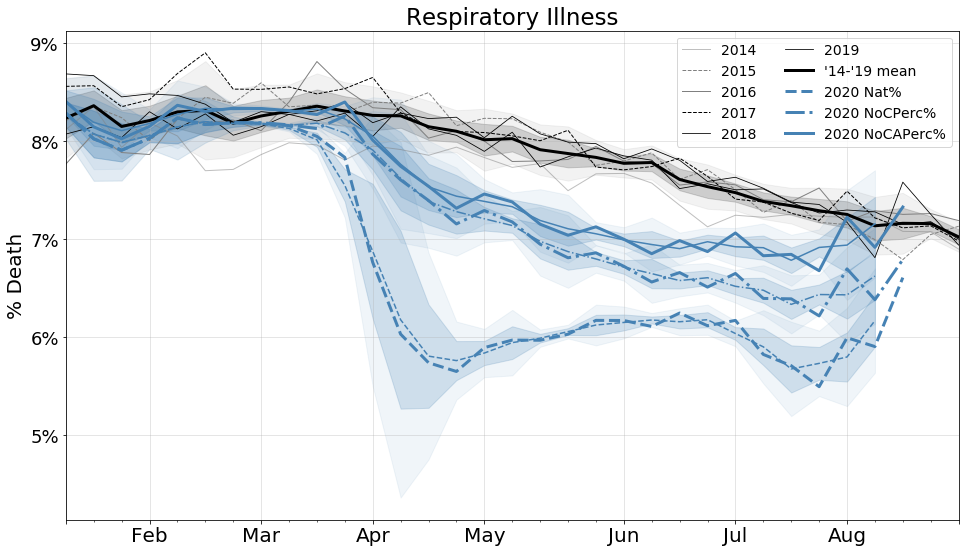

In [34]:
# Recalculate and replot the Respiratory Illness cause of death because the mean and 
# standard deviation need to be calculated slightly differently.

for c in ['RespIllness']: 
    
    cause_NAT = cause_dict[c][0]
    cause_NoC = cause_dict[c][1]
    cause_NoCA = cause_dict[c][2]
    cause_save = cause_dict[c][3]
    cause_color  = cause_dict[c][4]
    cause_title = cause_dict[c][5]

    d1 = dfj[dfj['Jurisdiction of Occurrence'] == state]['NatPercOtherResp']
    d2 = dfj[dfj['Jurisdiction of Occurrence'] == state]['NatPercChronicResp']
    df_c = d1+d2
    tx = df_c['2015'][0:52].index

    df_means_other = pd.concat([pd.Series(i.values) for i in [d1['2014'][0:52],d1['2015'][0:52], d1['2016'][0:52], d1['2017'][0:52],d1['2018'][0:52], d1['2019'][0:52]]],axis=1)
    df_means_chron = pd.concat([pd.Series(i.values) for i in [d2['2014'][0:52],d2['2015'][0:52], d2['2016'][0:52], d2['2017'][0:52],d2['2018'][0:52], d2['2019'][0:52]]],axis=1)

    df_means = df_means_other  + df_means_chron
    df_means.columns=['2014','2015','2016','2017','2018','2019']
    means = df_means.mean(axis=1);
    
    stds_other =df_means_other.std(axis=1); 
    stds_chron = df_means_chron.std(axis=1)
    stds  = (stds_chron+stds_other)/2
    
    plt.figure(figsize=(16,9));   aug  = 35

    a=df_c['2014'][0:52]; a.index = tx; a[2:aug].plot(linewidth=1.,color='gray',alpha=.5,linestyle='-')
    b=df_c['2015'][0:52]; b.index = tx; b[2:aug].plot(linewidth=1.,color='gray',alpha=1,linestyle='--')

    c=df_c['2016'][0:52]; c.index = tx; c[2:aug].plot(linewidth=1.,color='gray',alpha=1,linestyle='-')
    d=df_c['2017'][0:52]; d.index = tx; d[2:aug].plot(linewidth=1.,color='k',alpha=1,linestyle='--')

    e=df_c['2018'][0:52]; e.index = tx; e[2:aug].plot(linewidth=.8,color='k',alpha=1,linestyle='-')
    f=df_c['2019'][0:52]; f.index = tx; f[2:aug].plot(linewidth=.8,color='k',alpha=1,linestyle='-')
    
    # Plot mean/std
    means.index  = tx; stds.index = tx; means[2:aug].plot(linewidth=3,color='k')

    plt.fill_between(means[2:aug].index,means[2:aug]-(1*stds[2:aug]), means[2:aug]+(1*stds[2:aug]), color='k', alpha=0.15)
    plt.fill_between(means[2:aug].index,means[2:aug]-(1.96*stds[2:aug]), means[2:aug]+(1.96*stds[2:aug]), color='k', alpha=0.05)
        
    tx20 = tx[:len(pd.Series(df_c['2020'].values))];
    tx20_2 = tx20

    ## Nat
    df_nat = pd.Series(df_c['2020'].values)
    new_nat = df_nat
    new_nat.index  = tx20_2
    
    nat_roll = df_nat.rolling(MA).mean()
    nat_roll_shifted = nat_roll.shift(-1)
    nat_roll_shifted.index = tx20_2
    
    #  NoC and NoCA 
    df_noC = dfj[dfj['Jurisdiction of Occurrence'] == state][cause_NoC]['2020']
    df_noCA  =  dfj[dfj['Jurisdiction of Occurrence'] == state][cause_NoCA]['2020']

    new_noC = df_noC
    new_noCA =  df_noCA
    new_noC.index  = tx20_2
    new_noCA.index  = tx20_2

    noC_roll = df_noC.rolling(MA).mean()
    noC_roll_shifted = noC_roll.shift(-1)
    noC_roll_shifted.index = tx20_2
    
    noCA_roll = df_noCA.rolling(MA).mean()
    noCA_roll_shifted = noCA_roll.shift(-1)
    noCA_roll_shifted.index = tx20_2
    
    # Standard deviations
    nat_std = df_nat.rolling(MA).std()
    noC_std = df_noC.rolling(MA).std()
    noCA_std = df_noCA.rolling(MA).std()
    
    nat_std.index = noC_std.index = noCA_std.index = tx20_2
    
    new_nat.iloc[2:].plot(color=cause_color,linewidth=3,linestyle='--')
    f=new_noC.iloc[2:].plot(color=cause_color,linewidth=3,linestyle='-.')
    new_noCA.iloc[2:].plot(color=cause_color,linewidth=3,linestyle='-')

    nat_roll_shifted.iloc[2:].plot(color=cause_color,linewidth=1.5,linestyle='--')
    noC_roll_shifted.iloc[2:].plot(color=cause_color,linewidth=1.5,linestyle='-.')
    noCA_roll_shifted.iloc[2:].plot(color=cause_color,linewidth=1.5,linestyle='-')

    plt.fill_between(nat_roll_shifted.iloc[1:].index,nat_roll_shifted.iloc[1:].values-(1*nat_std.iloc[1:]),nat_roll_shifted.iloc[1:].values+(1*nat_std.iloc[1:]), color=cause_color, alpha=0.2)
    plt.fill_between(nat_roll_shifted.iloc[1:].index,nat_roll_shifted.iloc[1:].values-(2*nat_std.iloc[1:]),nat_roll_shifted.iloc[1:].values+(2*nat_std.iloc[1:]), color=cause_color, alpha=0.08)

    plt.fill_between(noC_roll_shifted.iloc[1:].index,noC_roll_shifted.iloc[1:].values-(1*noC_std.iloc[1:]), noC_roll_shifted.iloc[1:].values+(1*noC_std.iloc[1:]), color=cause_color, alpha=0.2)
    plt.fill_between(noC_roll_shifted.iloc[1:].index,noC_roll_shifted.iloc[1:].values-(2*noC_std.iloc[1:]), noC_roll_shifted.iloc[1:].values+(2*noC_std.iloc[1:]), color=cause_color, alpha=0.08)

    plt.fill_between(noCA_roll_shifted.iloc[1:].index,noCA_roll_shifted.iloc[1:].values-(1*noCA_std.iloc[1:]), noCA_roll_shifted.iloc[1:].values+(1*noCA_std.iloc[1:]), color=cause_color, alpha=0.2)
    plt.fill_between(noCA_roll_shifted.iloc[1:].index,noCA_roll_shifted.iloc[1:].values-(2*noCA_std.iloc[1:]), noCA_roll_shifted.iloc[1:].values+(2*noCA_std.iloc[1:]), color=cause_color, alpha=0.08)

    format_trendplot(plt.gcf(),plt.gca(),state,cause_title,cause_save)
    
    f.date_axis_info[3] = (2353,  True, False, b'%b')

    plt.savefig(out_path+f'fig2_US_{cause_save}.png')